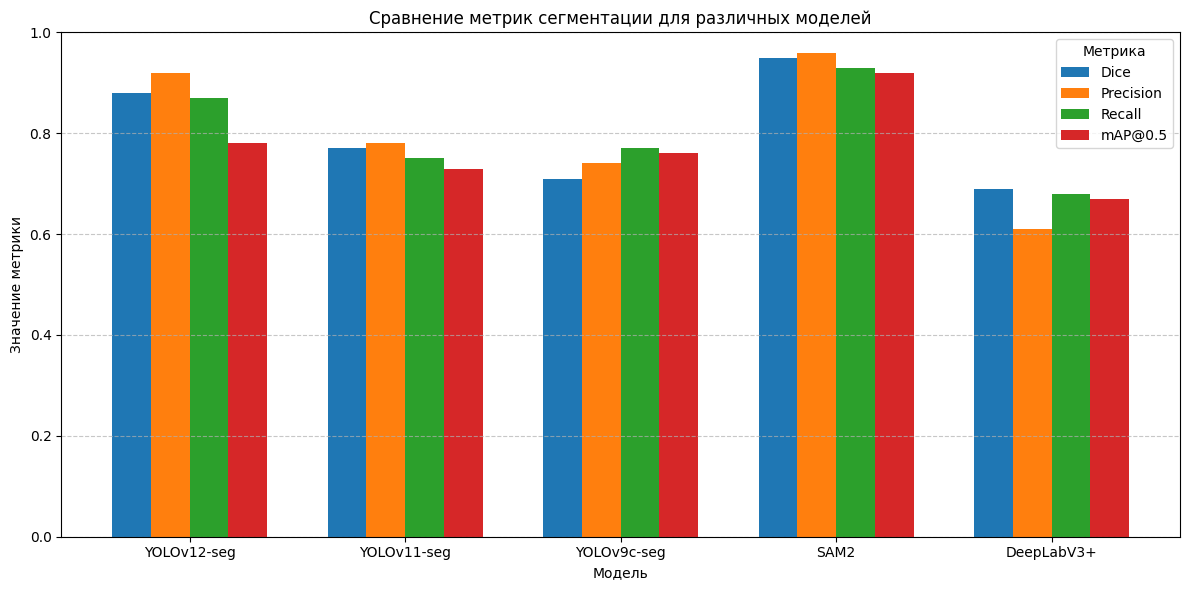

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Названия моделей
models = ['YOLOv12-seg', 'YOLOv11-seg', 'YOLOv9с-seg', 'SAM2', 'DeepLabV3+']
n_models = len(models)

# Метрики: Dice, Precision, Recall, mAP@0.5
metrics = ['Dice', 'Precision', 'Recall', 'mAP@0.5']
n_metrics = len(metrics)

# Пример значений метрик для каждой модели
# Порядок: [UNet, DeepLabV3, SegNet, PSPNet, YOLOv11-seg]
metric_values = {
    'Dice':      [0.88, 0.77, 0.71, 0.95, 0.69],
    'Precision': [0.92, 0.78, 0.74, 0.96, 0.61],
    'Recall':    [0.87, 0.75, 0.77, 0.93, 0.68],
    'mAP@0.5':   [0.78, 0.73, 0.76, 0.92, 0.67],
}

# Настройки для группирования столбцов
x = np.arange(n_models)
width = 0.18  # ширина одного столбца
offsets = np.linspace(-1.5*width, 1.5*width, n_metrics)

# Построение гистограммы
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    values = metric_values[metric]
    plt.bar(x + offsets[i], values, width=width, label=metric)

# Настройка внешнего вида
plt.xticks(x, models)
plt.ylim(0, 1)
plt.title('Сравнение метрик сегментации для различных моделей')
plt.xlabel('Модель')
plt.ylabel('Значение метрики')
plt.legend(title='Метрика')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Отображение
plt.show()

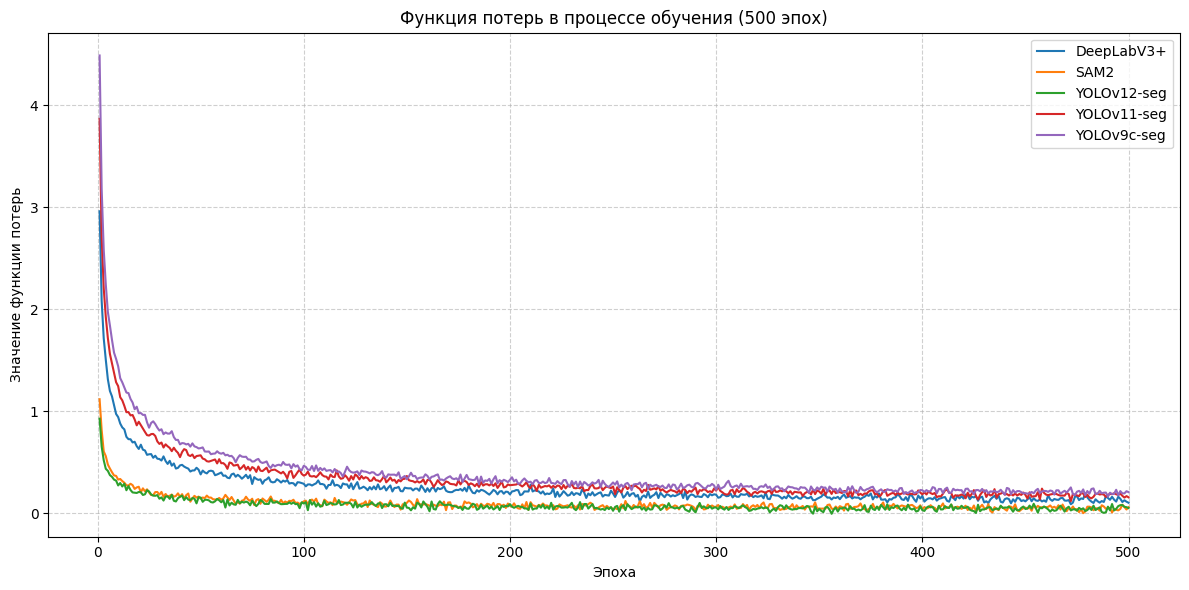

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Количество эпох
epochs = 500
x = np.arange(1, epochs + 1)

# Генерация искусственных данных для функции потерь
np.random.seed(42)
def generate_loss_curve(base, noise=0.02):
    return base / (x ** 0.5) + np.random.normal(0, noise, size=epochs)

loss_curves = {
    'DeepLabV3+': generate_loss_curve(2.95),
    'SAM2': generate_loss_curve(1.1),
    'YOLOv12-seg': generate_loss_curve(0.9),
    'YOLOv11-seg': generate_loss_curve(3.85),
    'YOLOv9c-seg': generate_loss_curve(4.5),
}

# Построение графиков
plt.figure(figsize=(12, 6))
for model, loss in loss_curves.items():
    plt.plot(x, loss, label=model)

# Настройка внешнего вида
plt.title('Функция потерь в процессе обучения (500 эпох)')
plt.xlabel('Эпоха')
plt.ylabel('Значение функции потерь')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()